In [1]:
from bs4 import BeautifulSoup
import requests # sends requests to a website
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
from pandas import DataFrame

from selenium import webdriver
import chromedriver_autoinstaller

import re


chromedriver_autoinstaller.install() 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
website = 'https://www.realmeye.com'
result = requests.get(website)
context = result.status_code
soup = BeautifulSoup(result.content, 'html.parser')
print(soup.prettify())

403



In [3]:
from selenium import webdriver

death_source = []

base_url = 'https://www.realmeye.com/recent-deaths/'

# Initialize an empty list to store website names
website_names = ['https://www.realmeye.com/recent-deaths/']

# Generate website names
for i in range(101, 7801, 100):
    website_names.append(base_url + str(i))
    
for i in range(len(website_names)):
    driver = webdriver.Chrome()
    driver.maximize_window()
    driver.get(website_names[i])


    for i in range(1,101):
        element = driver.find_element_by_xpath(f"/html/body/div[1]/div/div/div[3]/table/tbody/tr[{i}]")
        death_source.append(element.text)

    driver.quit()
    
df = pd.DataFrame(death_source)
# print(len(df))

df = df.rename(columns={0:"death_source"})    

df.replace('', pd.NA, inplace=True)
df.dropna(inplace=True)

columns1 = ['Player Name', 'Date', 'Time', 'Max Ratio', 'Cause of Death']
column = []
for j in range(len(df['Cause of Death'])):
    parts = df['Cause of Death'][j]
    for i in range(len(parts)):
        if '/8' in parts[i] :
            column.append(parts[:3]+ [parts[i]] + [' '.join(parts[i+1:])] )
            
df = pd.DataFrame(column, columns = columns1)

today = datetime.today().strftime('%Y-%m-%d')
df.to_csv('./ROTMG/May 24/{today}.csv')

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"/html/body/div[1]/div/div/div[3]/table/tbody/tr[64]"}
  (Session info: chrome=124.0.6367.202)


      Unnamed: 0 Player Name        Date   Time Max Ratio  \
0              0  Wolfkingme  2024-05-14  18:30       0/8   
1              1  Pastamance  2024-05-14  18:28       0/8   
2              2  LDeadhandl  2024-05-14  18:28       8/8   
3              3         Qwn  2024-05-14  18:27       0/8   
4              4  Pgwhitebag  2024-05-14  18:27       0/8   
...          ...         ...         ...    ...       ...   
3092        3092   MrCyanite  2024-05-13  18:54       2/8   
3093        3093      Caouse  2024-05-13  18:54       8/8   
3094        3094  TotenHoten  2024-05-13  18:54       0/8   
3095        3095   CastRiver  2024-05-13  18:54       5/8   
3096        3096     Imnphil  2024-05-13  18:54       8/8   

                 Cause of Death  
0                 GC Boss Child  
1       Carboniferous Dragonfly  
2           MV Pattern Helper 1  
3              Brown Den Spider  
4                Hallows Wraith  
...                         ...  
3092         Oryx the Mad God

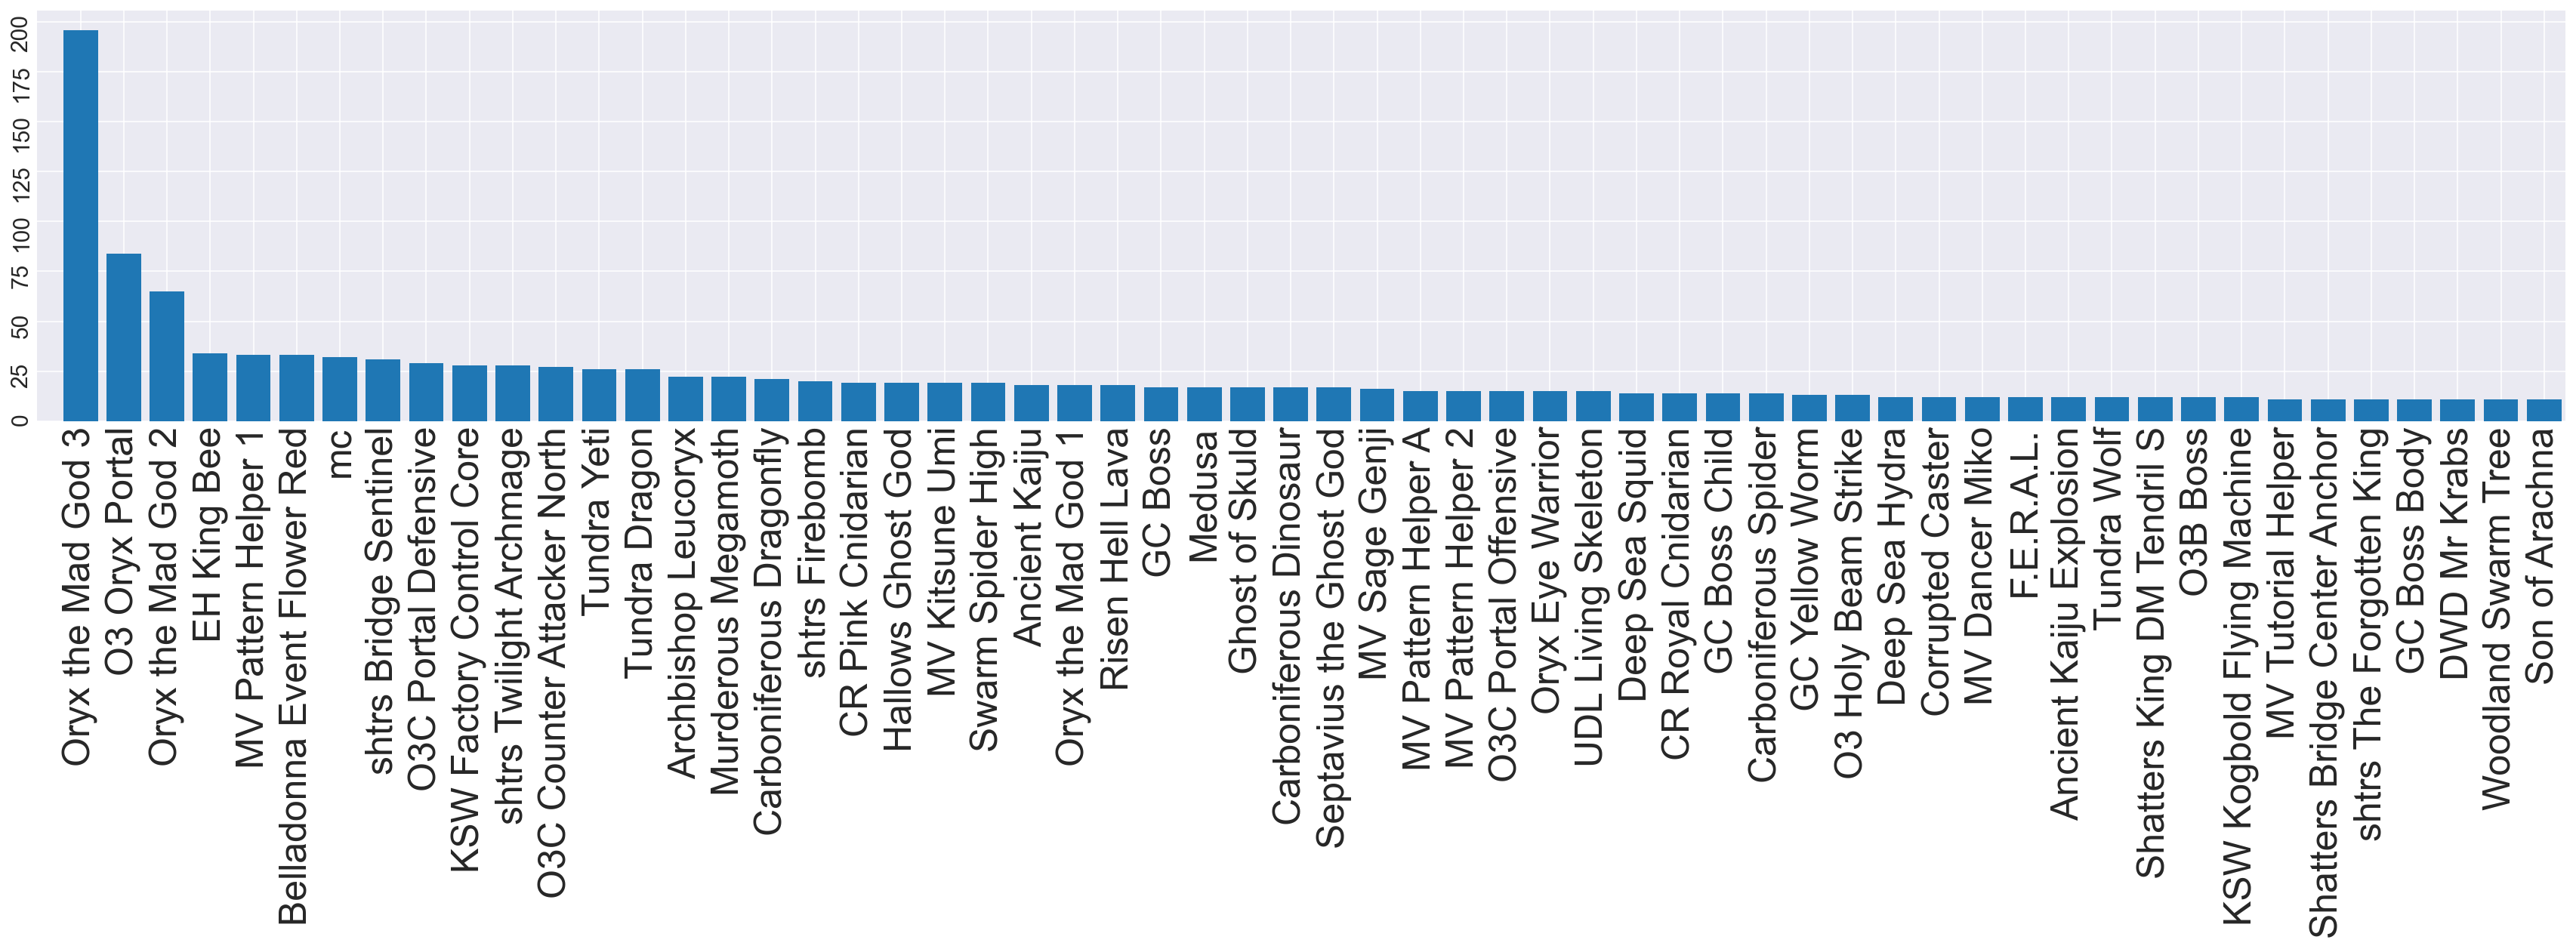

In [9]:

# df = pd.DataFrame(death_source)
# # print(len(df))

# df = df.rename(columns={0:"death_source"})

df = pd.read_csv('./ROTMG/May 24/5_12-5_14.csv')
print(df)
df.replace('', pd.NA, inplace=True)
df.dropna(inplace=True)

# columns1 = ['Player Name', 'Date', 'Time', 'Max Ratio', 'Cause of Death']
# column = []
# for j in range(len(df['Cause of Death'])):
#     parts = df['Cause of Death'][j]
#     for i in range(len(parts)):
#         if '/8' in parts[i] :
#             column.append(parts[:3]+ [parts[i]] + [' '.join(parts[i+1:])] )
# df = pd.DataFrame(column, columns = columns1)
counts = pd.DataFrame(df['Cause of Death'].value_counts())
high_counts = counts[counts >10].dropna()

# print(df)
# df.to_csv('5_12-5_14.csv')

plt.figure(figsize = (30,5))
plt.style.use('seaborn-darkgrid')  # Change the style here
plt.bar(high_counts.index, high_counts['Cause of Death'])
plt.xticks(rotation = 90, size = 25)
plt.yticks(rotation = 90, size = 15)
plt.xlim(-1, len(high_counts.index) - 0.5)
plt.savefig('ROTMG_stats_5_14', facecolor = 'White', bbox_inches='tight')
plt.show()


C:\Users\jdt45\anaconda3\lib\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


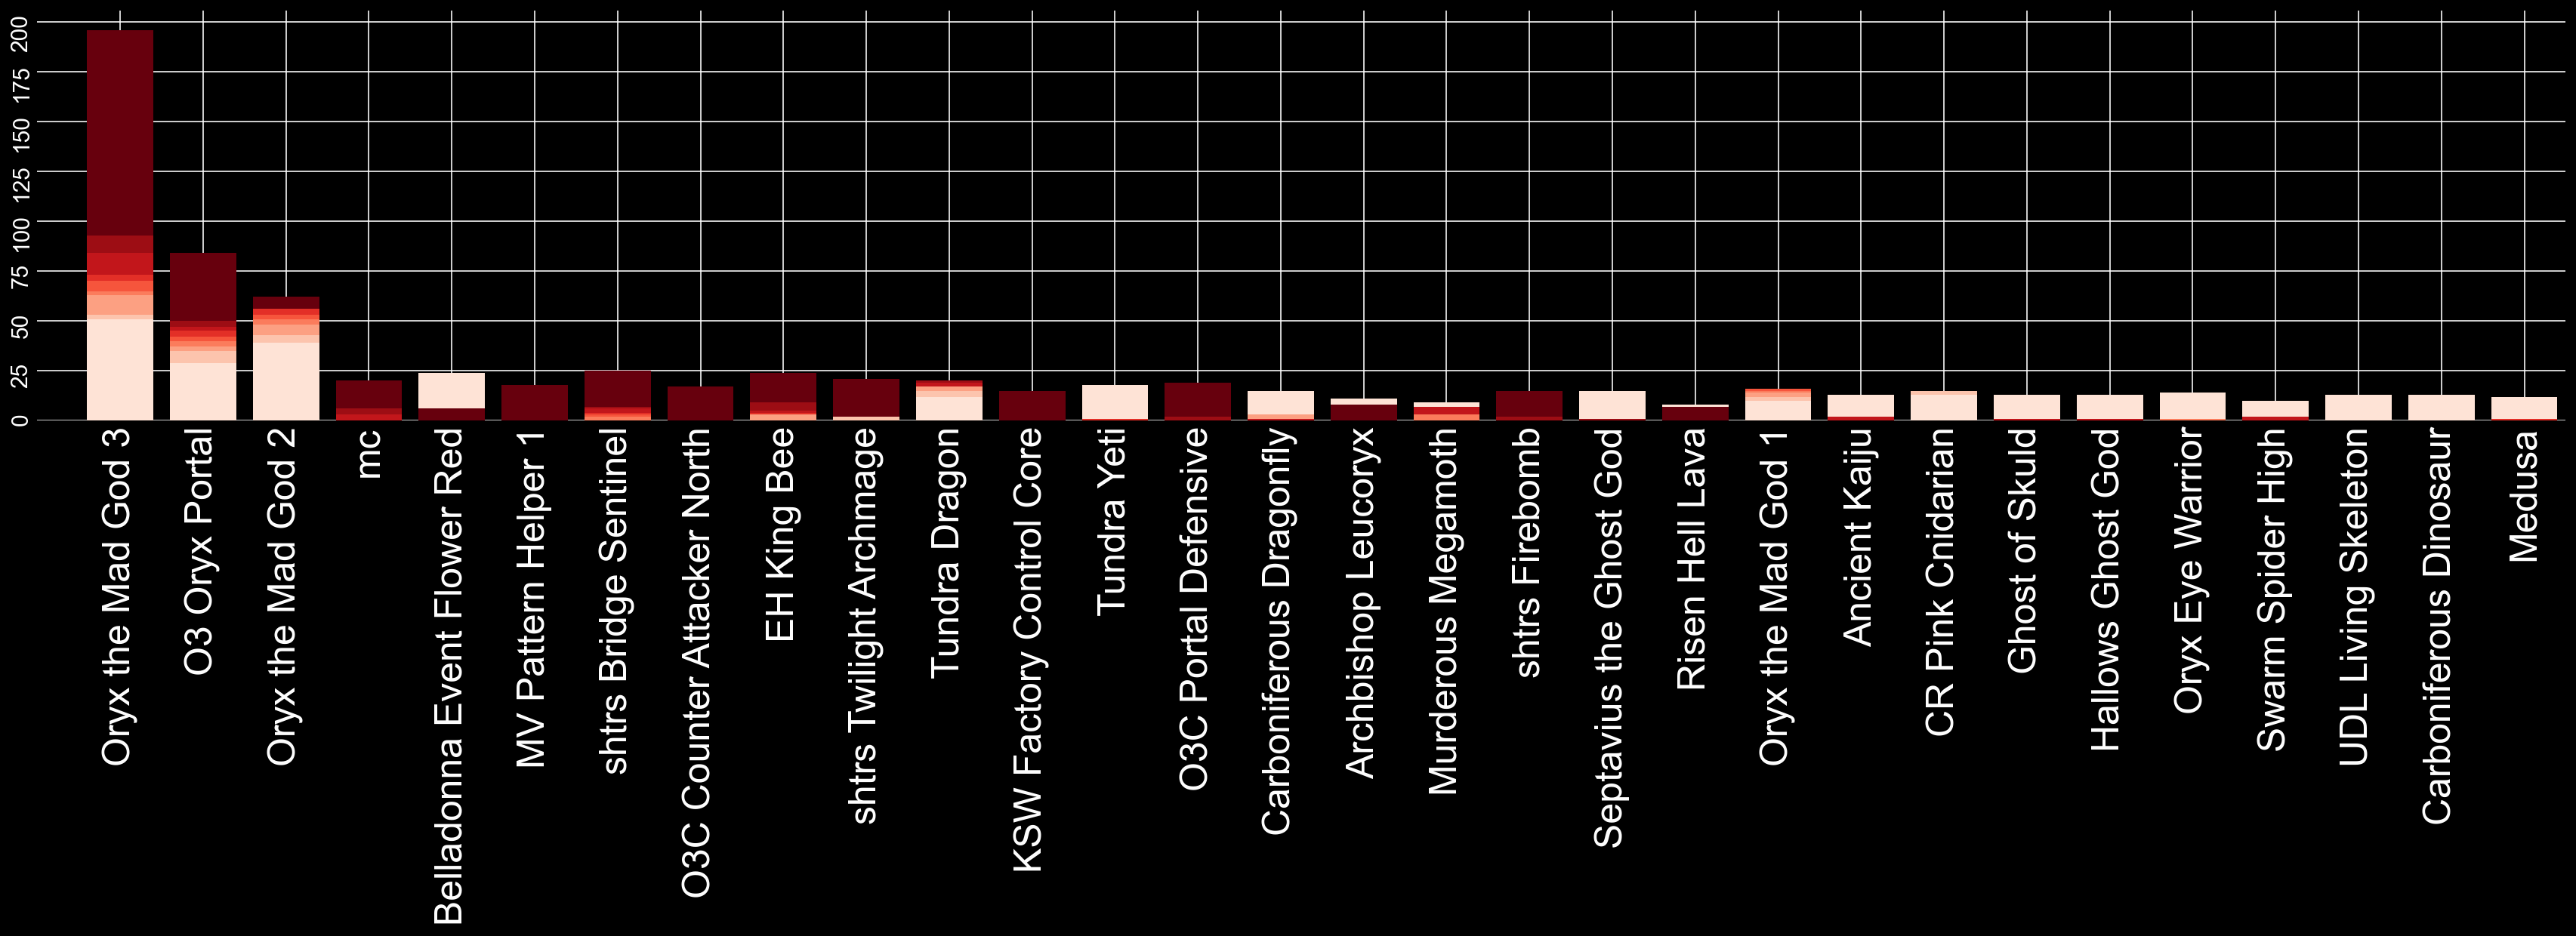

{'LH Oryx Swordsman': [0, 0, 0, 0, 1, 0, 0, 0, 0], 'Tundra Troll': [0, 1, 0, 0, 0, 0, 0, 0, 0], 'City Medusa': [8, 0, 0, 0, 0, 0, 0, 0, 0], 'New Top Vertical Trap': [0, 1, 0, 0, 0, 1, 0, 0, 0], 'SulfW God': [0, 1, 0, 0, 0, 1, 0, 0, 0], 'Son of Arachna': [0, 0, 0, 1, 0, 0, 1, 0, 0], 'Carboniferous Dragonfly': [15, 0, 3, 0, 0, 0, 1, 0, 0], 'Ancient Kaiju Explosion': [9, 0, 0, 0, 0, 0, 0, 0, 0], "Pirate's Tavern Piano": [0, 0, 0, 1, 0, 0, 0, 0, 0], 'SulfW Boss': [0, 0, 0, 0, 0, 1, 0, 1, 0], 'F.E.R.A.L.': [0, 0, 0, 0, 0, 0, 1, 0, 0], 'MV Pattern Helper A': [0, 0, 0, 0, 0, 0, 0, 0, 8], 'M.E.R.V.': [0, 0, 0, 0, 0, 0, 2, 0, 0], 'Red Spotted Den Spider': [8, 0, 0, 0, 0, 0, 0, 0, 0], 'DWD Admiral': [0, 1, 0, 0, 1, 0, 0, 0, 0], 'Earth Elemental Small Smash': [0, 0, 0, 1, 0, 0, 0, 0, 0], 'SulfW Stalker': [0, 2, 1, 1, 0, 1, 0, 0, 0], 'CR Royal Cnidarian': [9, 0, 0, 0, 0, 0, 2, 0, 0], 'GC Boss Child': [8, 2, 0, 0, 0, 0, 0, 1, 0], 'Davy Jones': [8, 0, 0, 0, 0, 0, 0, 0, 0], 'MV Pattern Helper 2': [0,

In [11]:
# Group by Cause_of_death and find the maximum ratio for each cause
df_ratios = pd.get_dummies(df['Max Ratio'])
merged_df = pd.DataFrame(df['Cause of Death']).combine_first(df_ratios)


summary = merged_df.groupby(merged_df.columns.tolist()).size().reset_index(name='count')
new_sum2 = pd.DataFrame(df.groupby('Max Ratio')['Cause of Death'])


counts = []
causes = []
count = []
for i in range(len(new_sum2)):
    counts.append(new_sum2[1][i].value_counts())
    df_new = pd.DataFrame(counts[i])
    causes.append(df_new.index)
    count.append(df_new)
# causes = pd.DataFrame(counts[8]).index
# count = counts[8]

causes = pd.DataFrame(causes); count = pd.DataFrame(count).dropna(axis=1, how= 'any')
merge_again = pd.DataFrame(causes.values.tolist()).combine_first(pd.DataFrame(count.values.tolist())).dropna(axis=1, how= 'any')
# merge_again = merge_again.where(pd.notna(merge_again), np.nan).dropna(axis=1, thresh=1)
merge_again1 = merge_again[0][:]
dicts = []
for i in range(len(merge_again)):
    d_values = dict(zip(merge_again.T[i], count[0][i]['Cause of Death'][:38]))
    dicts.append(d_values)
    
def count_key_occurrences(dicts_list):
    # Gather all unique keys across all dictionaries
    all_keys = set(key for dictionary in dicts_list for key in dictionary.keys())
    
    # Initialize the result dictionary with empty lists for all keys
    result = {key: [] for key in all_keys}

    # Iterate through each dictionary in the list
    for dictionary in dicts_list:
        # Iterate through all unique keys
        for key in all_keys:
            # Append the value if the key exists, otherwise append 0
            result[key].append(dictionary.get(key, 0))
    
    return result

def sort_by_highest_sum(result):
    # Calculate the sum of each list in the dictionary
    sums = {key: sum(values) for key, values in result.items()}
    
    # Sort keys by their sums in descending order
    sorted_keys = sorted(sums.keys(), key=lambda x: sums[x], reverse=True)
    
    # Keep track of the original location of each key
    original_locations = {key: list(result.keys()).index(key) for key in sorted_keys}
    
    # Initialize the final dictionary with order of highest sums
    final_dict = {sum_key: original_locations[sum_key] for sum_key in sorted_keys}
    
    return final_dict


def find_item_by_index(dictionary, index):
    try:
        key = list(dictionary.keys())[index]
        value = dictionary[key]
        return key, value
    except IndexError:
        return None

# Find the item at index 2 (third position)
# result = find_item_by_index(result, final_dict[0])


plt.figure(figsize = (30,5))
plt.style.use('dark_background')
cmap = plt.get_cmap('Reds')
colors = [cmap(i / 9) for i in range(10)]

result = count_key_occurrences(dicts)
final_dict = sort_by_highest_sum(result) 
for j in range(0,30):
    final_key, final_val = find_item_by_index(result, list(final_dict.values())[j])    
    bottom1 = 0
    color_count = 0
    for i in range(len(final_val)):
#         print(i,j)
        if final_val[i] == 0:
            bottom1 += 0
            color_count += 1
#             print('Val is zero', bottom1, color_count)
            pass
        else:
            if i != 0:
                bottom1 += final_val[i-1]
            elif i ==0:
                bottom1 += 0
            color_count+=1
            plt.bar(final_key, final_val[i], bottom = bottom1, label = f'{i}/8', color = colors[color_count])

plt.xticks(rotation = 90, size = 25)
plt.yticks(rotation = 90, size = 15)
plt.xlim(-1, 30 - 0.5)
plt.savefig('ROTMG_stats_5_14', facecolor = 'Black', bbox_inches='tight')
# plt.legend()
plt.show()
print(result, final_dict)

In [ ]:
plt.figure(figsize = (30,5))
plt.style.use('seaborn-darkgrid')  # Change the style here
plt.bar(high_counts.index, high_counts['death_source'])
plt.xticks(rotation = 90, size = 25)
plt.yticks(rotation = 90, size = 15)
plt.xlim(-1, len(high_counts.index) - 0.5)
plt.savefig('ROTMG_stats_5_14', facecolor = 'White', bbox_inches='tight')
plt.show()

# plt.figure(figsize = (30,5))
# plt.style.use('seaborn-darkgrid')  # Change the style here
# plt.bar(high_counts.index, high_counts['death_source'])
# plt.xticks(rotation = 90, size = 25)
# plt.yticks(rotation = 90, size = 15)
# plt.xlim(-1, len(high_counts.index) - 0.5)
# plt.savefig('ROTMG_5_14', facecolor = 'White', bbox_inches='tight')
# plt.show()

In [ ]:
# Data
categories = ['Category A', 'Category B', 'Category C', 'Category D', 'Category E']
percentages = [20, 30, 15, 25, 10]  # Percentages for each category
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Colors for each category

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=colors)

# Add percentage labels on top of each bar
for i in range(len(categories)):
    plt.text(i, percentages[i] + 1, f"{percentages[i]}%", ha='center')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Percentages')
plt.title('Percentage Distribution by Category')

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
# Sample DataFrame for demonstration
data = {
    'Cause of Death': ['Heart Disease', 'Heart Disease', 'Cancer', 'Cancer', 'Accidents', 'Accidents'],
    'Category': ['Men', 'Women', 'Men', 'Women', 'Men', 'Women'],
    'Count': [320000, 315260, 290000, 308038, 90000, 71374]
}

df = pd.DataFrame(data)

# Pivot the DataFrame to get counts in a suitable format for stacked bar plot
pivot_df = df.pivot(index='Cause of Death', columns='Category', values='Count').fillna(0)

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Cause of Death')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Cause and Category')
plt.legend(title='Category')

# Show the plot
plt.tight_layout()
plt.show()